# solve_ivp
"No hay que reinventar la rueda"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Oscilador armonico

In [10]:
def rhs_harmonic(t, X, k, gamma):
  x, v = X
  dxdt = v
  dvdt = -k*x - gamma*v
  return [dxdt, dvdt]

In [35]:
# parametros
k = 1
gamma = 0.1
# IC
x0 = 1
v0 = 0
X0 = [x0,v0]
# integracion
sol = solve_ivp(rhs_harmonic, [0,12], X0, args=(k, gamma), method='RK45', rtol=1e-5, atol=1e-7)

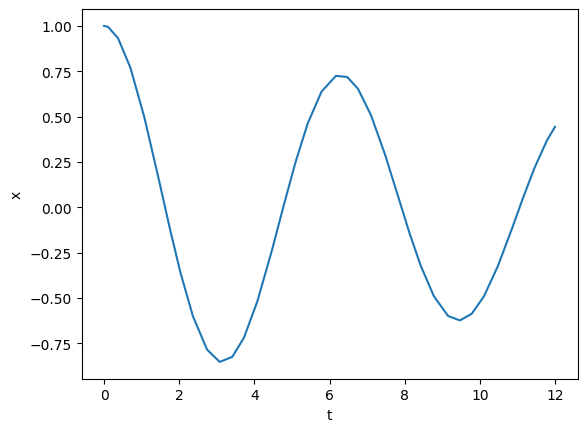

In [36]:
plt.figure()
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('x')
plt.show()

Que pasa cuando cambio la tolerancia?

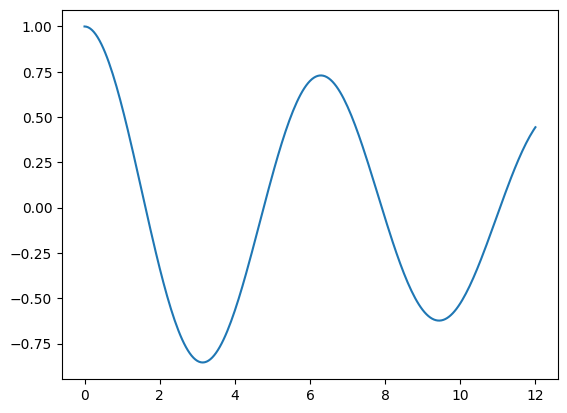

In [25]:
# dense output
sol_dense = solve_ivp(rhs_harmonic, [0,12], X0, args=(k, gamma), method='RK45', dense_output=True)
t_dense = np.arange(0,12+0.05,0.05)
x_dense = sol_dense.sol(t_dense)[0]
plt.plot(t_dense, x_dense)

## Sistema de Lorenz (clima)
Vamos a resolver el sistema de ecuaciones de Lorenz
## El Efecto Mariposa

Fue formulado por el matemático y meteorólogo **Edward Lorenz** en 1963. Originalmente, era un modelo muy simplificado de la convección atmosférica (es decir, el movimiento del aire y la transferencia de calor, relacionado con el clima).


### Las Ecuaciones

El sistema se describe por las siguientes tres ecuaciones, que son las que implementamos en nuestra función `rhs_lorenz`:

$$
\begin{align*}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= x y - \beta z
\end{align*}
$$

### Variables y Parámetros

**Variables (el estado del sistema en un tiempo `t`):**
* x(t): intensidad del movimiento convectivo (la "velocidad" de rotación de las celdas de convección).
* y(t): diferencia de temperatura horizontal entre las corrientes ascendentes y descendentes.
* z(t): distorsión del perfil de temperatura vertical (qué tan lineal es la temperatura con la altura).

**Parámetros (constantes que definen el "clima" del sistema):**
* $\sigma$ (**sigma**): El número de Prandtl (relaciona la viscosidad del fluido con su difusión térmica).
* $\rho$` (**rho**): El número de Rayleigh (relacionado con la diferencia de temperatura que impulsa el sistema).
* $\beta$ (**beta**): Una relación geométrica de la "caja" donde ocurre la convección.

In [37]:
def rhs_lorenz(t, X, sigma, rho, beta):
  x, y, z = X
  dxdt = sigma*(y - x)
  dydt = x*(rho - z) - yRelacionado con la
  dzdt = x*y - beta*z
  return [dxdt, dydt, dzdt]

In [38]:
# parametros
sigma = 9
rho = 20
beta = 2
# IC
x0 = 0.1
y0 = 1
z0 = 0.6
X0 = [x0,y0,z0]
# integracion
sol = solve_ivp(rhs_lorenz, [0,100], X0, args=(sigma, rho, beta), method='RK45')


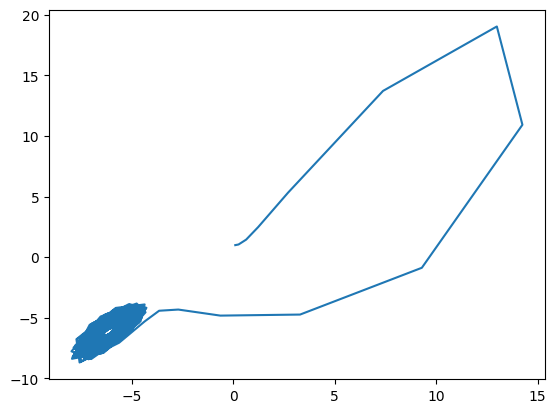

In [39]:
plt.figure()
plt.plot(sol.y[0], sol.y[1])

### Taller
* Hacer "dense output"
* Graficar en 3D x,y,z
* Comparar con el metodo "LSODA"
* Cambiar los parametros y las condiciones iniciales